# Exploring the NSL-KDD Dataset: A Comprehensive Analysis About Intrusion Detection System

## Introduction

In the realm of cybersecurity and network intrusion detection, the NSL-KDD dataset stands as a benchmark for evaluating machine learning models' performance. This dataset, derived from the original KDD Cup 1999 dataset, addresses the limitations and biases present in its predecessor, making it a vital resource for researchers and practitioners in the field of Intrusion Detection System (IDS).

This notebook embarks on a comprehensive exploration of the NSL-KDD dataset, focusing on building and evaluating machine learning models for intrusion detection. The key objectives of this project include:

1. **Importing Libraries:** Essential Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn are imported to facilitate data manipulation, visualization, and model building.

2. **Reading Dataset:** The NSL-KDD dataset is loaded into the environment, laying the foundation for subsequent analyses and model development.

3. **Data Cleaning:** Data cleaning operations address missing values, handle outliers, and ensure the dataset's integrity, preparing it for exploratory data analysis (EDA) and preprocessing stages.

4. **EDA and Visualization:** Exploratory data analysis and visualization techniques provide insights into the dataset's structure, feature distribution, correlations, and potential patterns, aiding in understanding network traffic and intrusion behaviors.

5. **Preprocessing:** Preprocessing techniques such as feature scaling, encoding categorical variables, and data transformation prepare the dataset for model training, ensuring compatibility with machine learning algorithms.

6. **Feature Engineering:** Feature engineering strategies create new features, extract relevant information, and enhance predictive power, refining the dataset for intrusion detection analysis.

7. **Model Building:** 
   - **XGBoost (XGB):** XGBoost is employed as a powerful gradient boosting algorithm known for its high performance in classification tasks. Its ability to handle complex relationships and large datasets makes it a valuable tool for intrusion detection.
   - **Logistic Regression:** Logistic Regression is utilized for its simplicity and interpretability, making it an effective baseline model for binary classification tasks. It provides insights into the linear relationships between features and the target variable, aiding in understanding intrusion detection patterns.
8. **Evaluation:** Model evaluation metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) provide insights into model performance and efficacy in detecting network intrusions.

9. **Feature Importance:** Feature importance analysis identifies key factors contributing to intrusion detection, enabling prioritization of features and enhancing model interpretability.

10. **Results:** The analysis presents strengths and limitations of different machine learning models, discusses insights gained, and outlines recommendations for improving network intrusion detection strategies.

This exploration into the NSL-KDD dataset navigates through the complexities of network intrusion detection, leveraging machine learning techniques to fortify defenses against cyber threats.



# 1. IMPORT LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
pd.set_option('display.float_format' , lambda x: '%3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# 2. READ DATASET

In [7]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000000,0.600000,0.880000,0.000000,0.000000,0.000000,0.000000,0.000000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100000,0.050000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000000,0.000000,0.030000,0.040000,0.030000,0.010000,0.000000,0.010000,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070000,0.070000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,neptune,21


# 2.1 ADJUST COLUMNS

In [8]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

We don't have the names of the features from the given dataset so i adjust the columns from : https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [9]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000000,0.600000,0.880000,0.000000,0.000000,0.000000,0.000000,0.000000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100000,0.050000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000000,0.000000,0.030000,0.040000,0.030000,0.010000,0.000000,0.010000,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070000,0.070000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,neptune,21


# 2.2 INSIGHTS

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  int64  
 2   2       125973 non-null  int64  
 3   3       125973 non-null  int64  
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  int64  
 21  21      12

We have different types of dtypes, we need encoding, doesn't seem like we have null values but we will check

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,125973.000000,287.144650,2604.515310,0.000000,0.000000,0.000000,0.000000,42908.000000
1,125973.000000,1.053202,0.426620,0.000000,1.000000,1.000000,1.000000,2.000000
2,125973.000000,31.226469,16.346470,0.000000,20.000000,24.000000,49.000000,69.000000
3,125973.000000,6.979996,2.689365,0.000000,5.000000,9.000000,9.000000,10.000000
4,125973.000000,45566.743000,5870331.181894,0.000000,0.000000,44.000000,276.000000,1379963888.000000
5,125973.000000,19779.114421,4021269.151441,0.000000,0.000000,0.000000,516.000000,1309937401.000000
6,125973.000000,0.000198,0.014086,0.000000,0.000000,0.000000,0.000000,1.000000
7,125973.000000,0.022687,0.253530,0.000000,0.000000,0.000000,0.000000,3.000000
8,125973.000000,0.000111,0.014366,0.000000,0.000000,0.000000,0.000000,3.000000
9,125973.000000,0.204409,2.149968,0.000000,0.000000,0.000000,0.000000,77.000000


There are some outlier values, but we will check if it's too much

In [16]:
import pandas as pd
# Dosyayı tekrar yükle
df = pd.read_csv("C:\\Users\\musta\\Downloads\\intrusion-detection-system-nsl-kdd.ipynb.")

# Veri setinin ilk birkaç satırını inceleyelim
print(df.head())



ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


# 3. DATA CLEANING

# 3.1 NULL VALUES

In [62]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

Dataset doesn't contain any null value

In [63]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [64]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: 41
------------------------------
Unique Values (2): ['normal' 'attack']

Value Counts:
41
normal    67343
attack    58630
Name: count, dtype: int64



Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

# 3.2 DUPLICATES

In [65]:
df.duplicated().sum()

np.int64(9)

Dataset doesn't contain any duplicated row

# 3.3 OUTLIERS

In [66]:
df.shape

(125973, 43)

In [67]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

ValueError: Layout of 8x5 must be larger than required size 42

<Figure size 2000x4000 with 0 Axes>

<Figure size 2000x4000 with 0 Axes>

There is no too much outlier to misslead the model so i will not drop the outliers

# 3.4 CLASSIFY ATTACK OR NOT

In [55]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

AttributeError: 'DataFrame' object has no attribute 'attack'

In [29]:
print(f"'{df.columns[41]}'")  # attack sütununun tam adı


'attack'


In [54]:
df['attack'].unique()

KeyError: 'attack'

# 4. EDA - VISUALIZATIONS

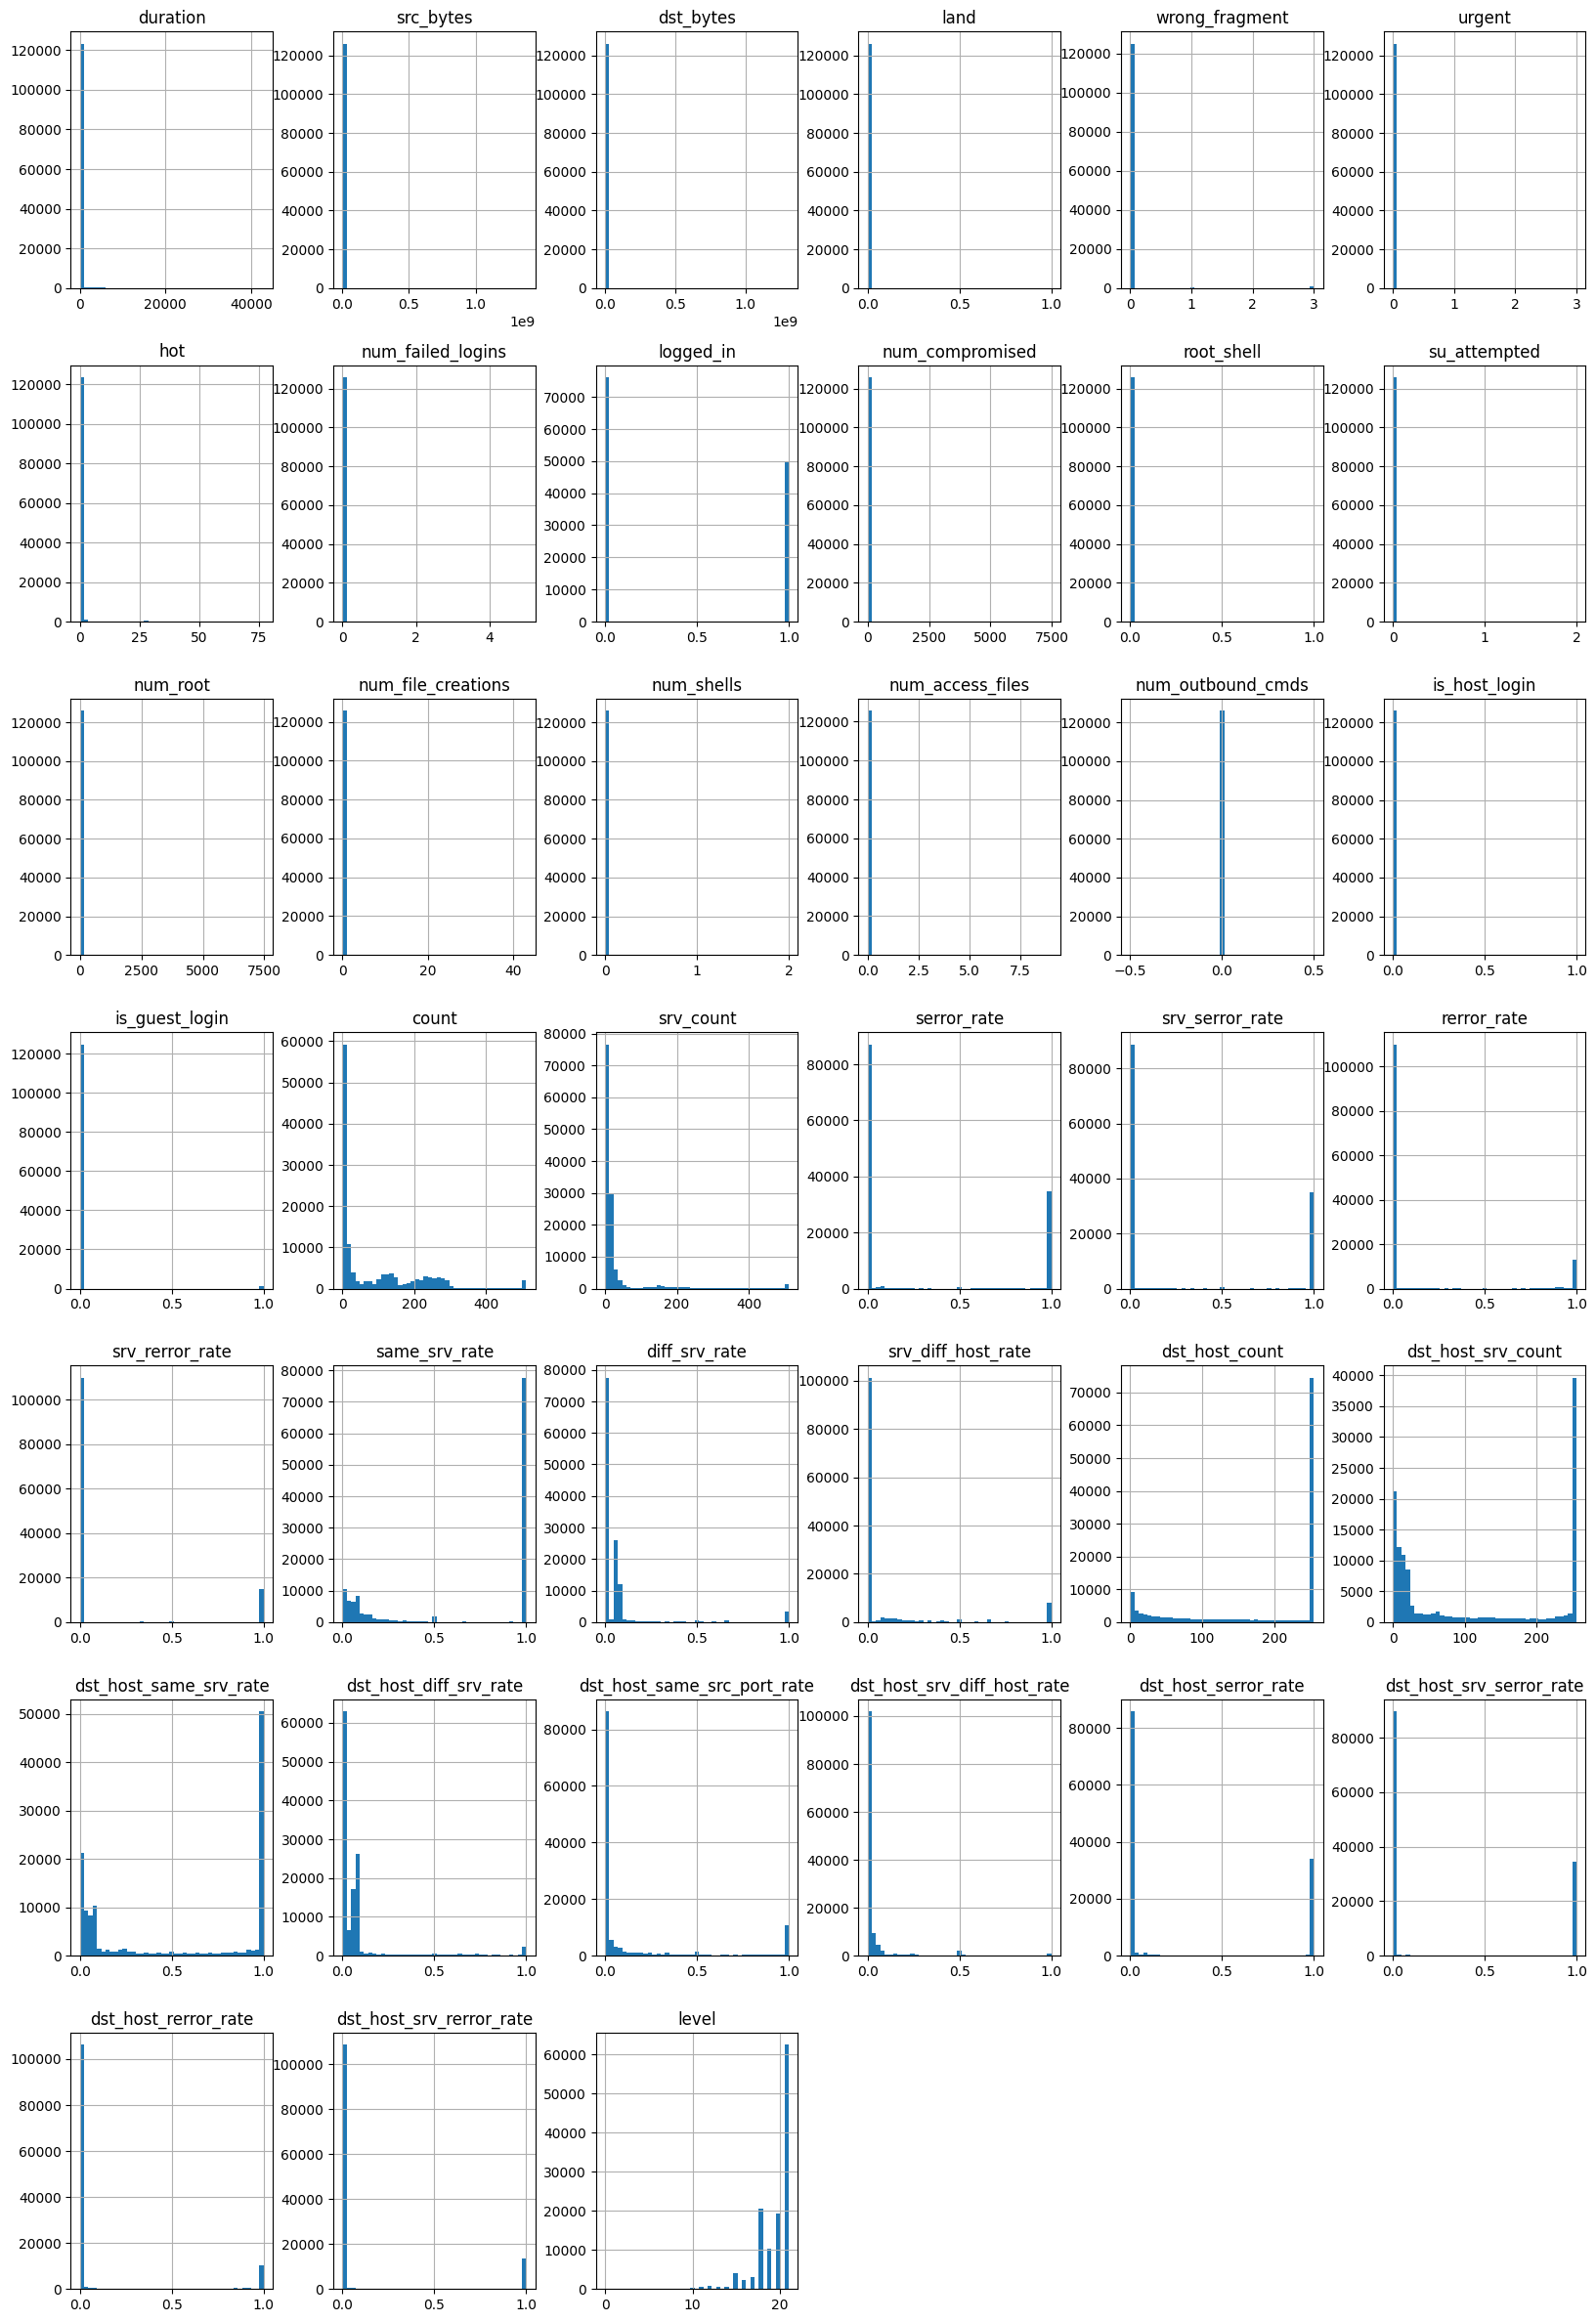

In [31]:
df.hist(bins=43,figsize=(20,30));

General visualization in order to get insights

# 4.1 Protocol Type

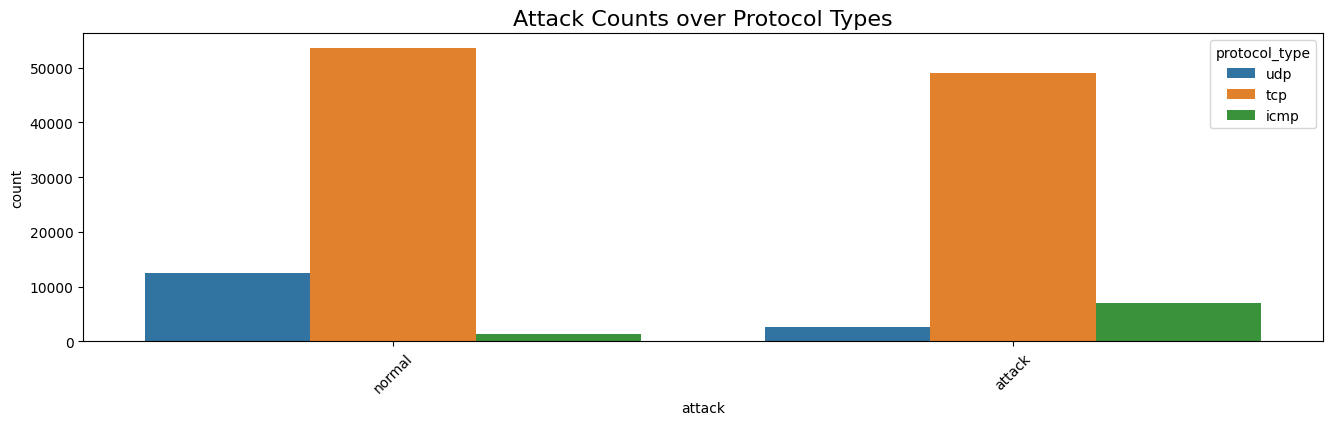

In [32]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [ ]:
# So we can see that most of the attacks are from tcp, then udp, and least attack comes from icmp

In [33]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815165
udp    0.119019
icmp   0.065816
Name: proportion, dtype: float64

# 4.2 Service used general

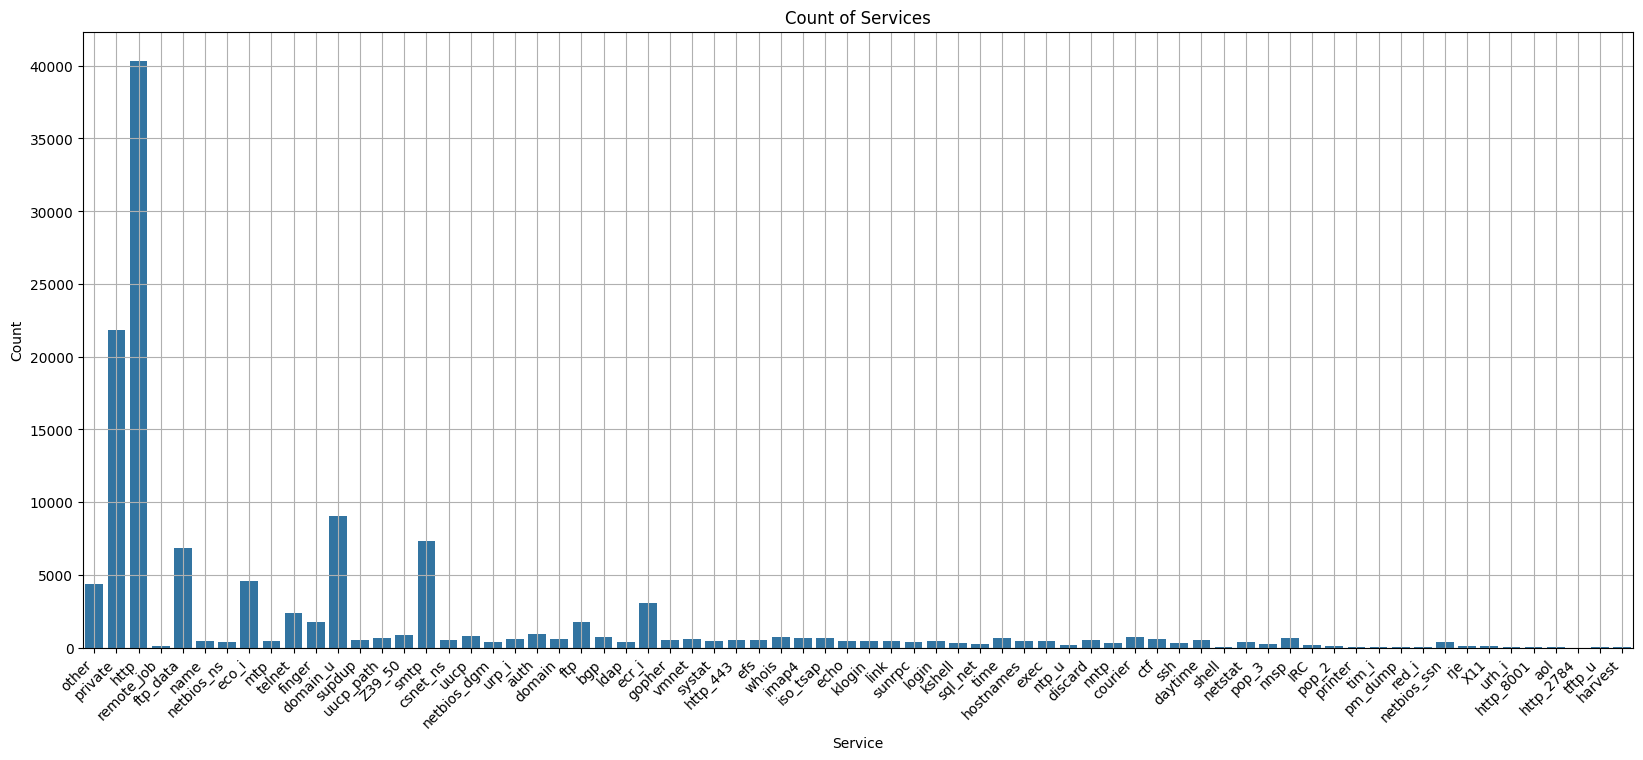

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


In [ ]:
# Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

# 4.3 Service used effect on attacks

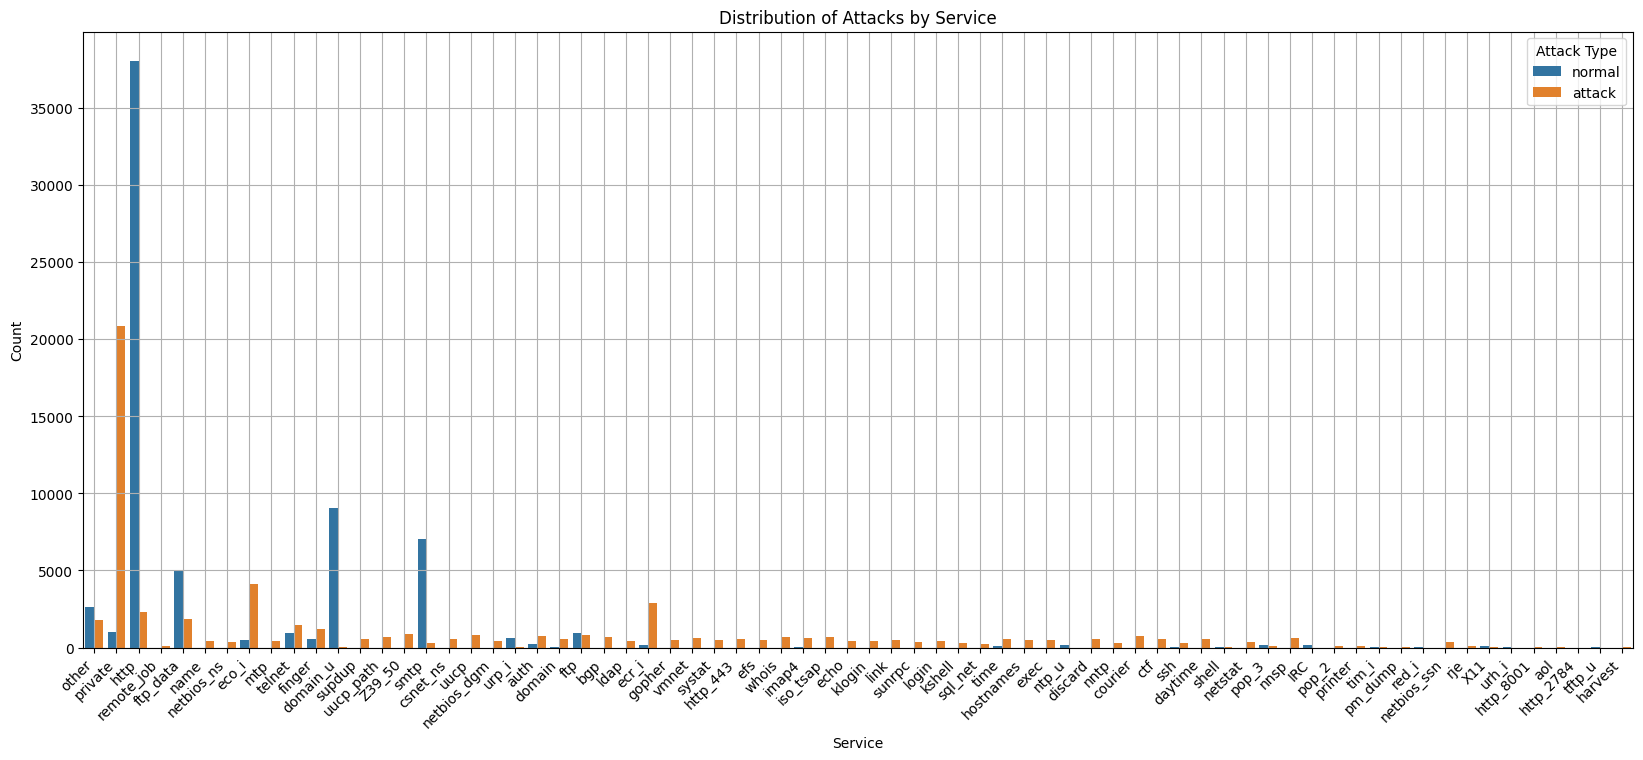

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


In [ ]:
#we can see that private attacks is most common service 

# 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

<Figure size 1200x800 with 0 Axes>

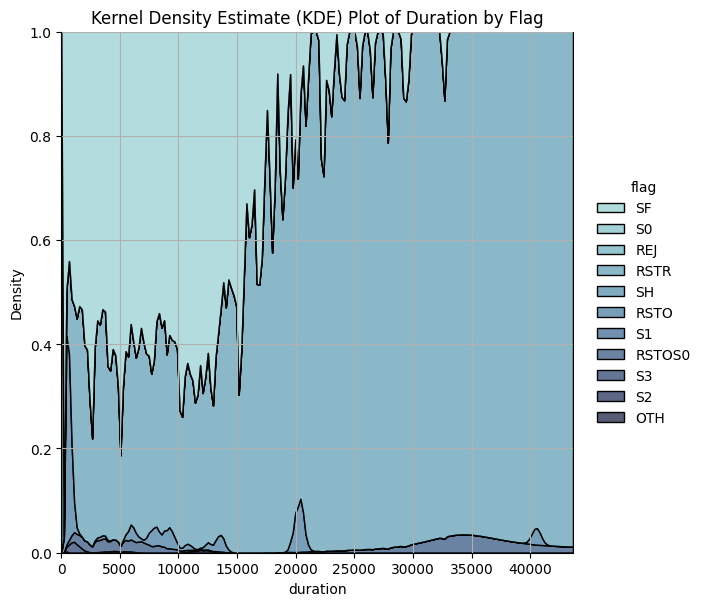

In [36]:

plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()


# 4.5 Distribution of Attack Types by Guest Login

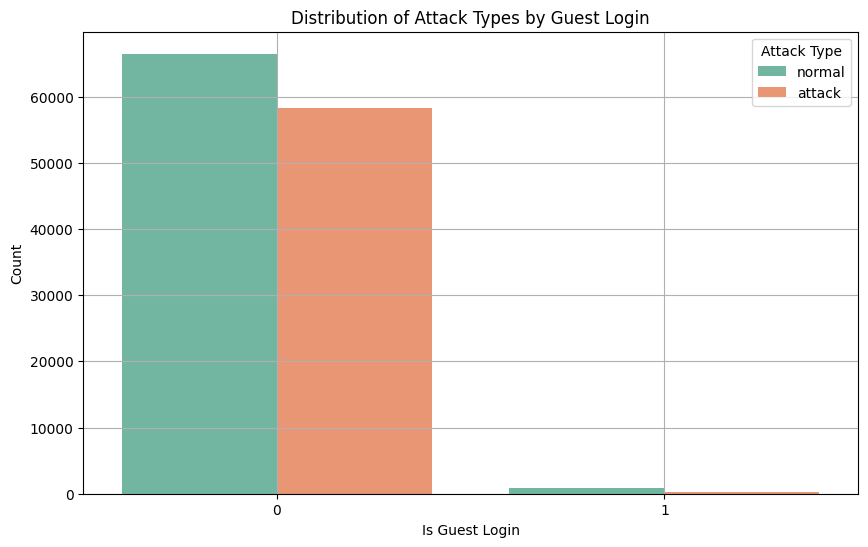

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

we can clearly say that attacks are comes when guest is not login

# 5. PREPROCESSING

# 5.1 ENCODING

In [38]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [39]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

# 5.2 TRAIN-TEST-SPLIT

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

KeyError: "['attack'] not found in axis"

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("KDDTrain+.txt", header=None)

encoder = LabelEncoder()
df[1] = encoder.fit_transform(df[1])  # protocol_type
df[2] = encoder.fit_transform(df[2])  # service
df[3] = encoder.fit_transform(df[3])  # flag

# Etiket sütunu: saldırı mı değil mi?
df[41] = df[41].apply(lambda x: 'normal' if x == 'normal' else 'attack')

# Özellikler ve hedef
X = df.iloc[:, 0:41]  # attack sütunu hariç
y = df[41]            # attack etiketi

# Normalizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test veri bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [52]:
train_index = X_train.columns
train_index

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# 5.3 Feature Engineering

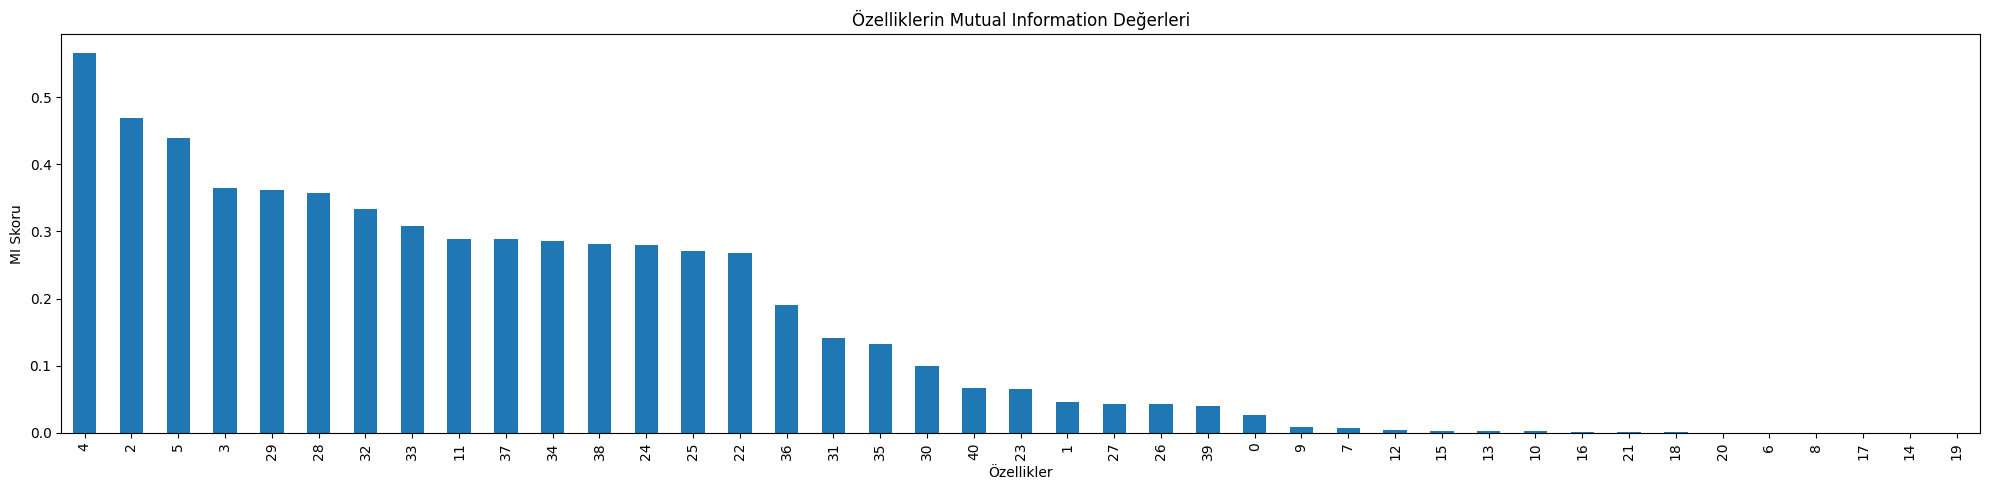

In [49]:
from sklearn.feature_selection import mutual_info_classif
# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = train_index
# mutual_info.sort_values(ascending=False)
# Mutual information hesapla
mutual_info = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

# Pandas Series formatına çevir
mutual_info = pd.Series(mutual_info, index=df.columns[:41])

# Sıralayıp bar plot çiz
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title("Özelliklerin Mutual Information Değerleri")
plt.xlabel("Özellikler")
plt.ylabel("MI Skoru")
plt.tight_layout()
plt.show()


In [50]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

# 5.4 Feature Selection

In [51]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

NameError: name 'train_index' is not defined

In [ ]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

# 5.5 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

# 6. MODEL BUILD

In [2]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [4]:
XGBoost = XGBoost_model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
Logistic = Logistic_model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set

[[5421  407]

 [ 233 6537]]

              precision    recall  f1-score   support



           0       0.96      0.93      0.94      5828

           1       0.94      0.97      0.95      6770



    accuracy                           0.95     12598

   macro avg       0.95      0.95      0.95     12598

weighted avg       0.95      0.95      0.95     12598





Train_Set

[[49316  3486]

 [ 2140 58432]]

              precision    recall  f1-score   support



           0       0.96      0.93      0.95     52802

           1       0.94      0.96      0.95     60572



    accuracy                           0.95    113374

   macro avg       0.95      0.95      0.95    113374

weighted avg       0.95      0.95      0.95    113374




In [ ]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set

[[5816   12]

 [   8 6762]]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      5828

           1       1.00      1.00      1.00      6770



    accuracy                           1.00     12598

   macro avg       1.00      1.00      1.00     12598

weighted avg       1.00      1.00      1.00     12598





Train_Set

[[52746    56]

 [   29 60543]]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     52802

           1       1.00      1.00      1.00     60572



    accuracy                           1.00    113374

   macro avg       1.00      1.00      1.00    113374

weighted avg       1.00      1.00      1.00    113374




So we can see that ensemble methods such as xgboost,adaboost,gradientboosts has more accurace scores over logistic regression in bigger datasets.

It doesn't neccessary but we will do hyperparameter tuning in order to fit the model with best parameters, i would like to remember that xgboost has cross-validation has itself

# 6.1 HYPERPARAMETER TUNING

In [ ]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [5]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

NameError: name 'param_grid' is not defined

In [ ]:
XGB_grid_model.best_score_

0.9983093070545325

In [ ]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

# 6.2 FINAL MODEL

In [ ]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 6.3 EVALUATION

In [1]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])


NameError: name 'XGB_model' is not defined

In [ ]:
xgb_auc

0.9999736158858219

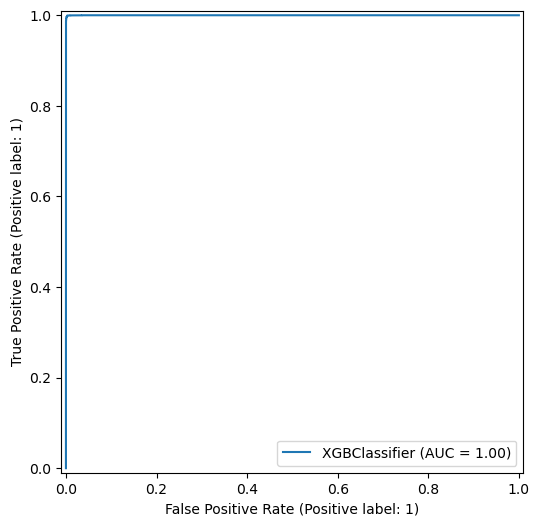

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [ ]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set

[[5811   17]

 [   6 6764]]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      5828

           1       1.00      1.00      1.00      6770



    accuracy                           1.00     12598

   macro avg       1.00      1.00      1.00     12598

weighted avg       1.00      1.00      1.00     12598





Train_Set

[[52684   118]

 [   37 60535]]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     52802

           1       1.00      1.00      1.00     60572



    accuracy                           1.00    113374

   macro avg       1.00      1.00      1.00    113374

weighted avg       1.00      1.00      1.00    113374




# 7. FEATURE IMPORTANCE

In [ ]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
src_bytes,0.186
logged_in,0.167
protocol_type,0.120
count,0.098
dst_bytes,0.095
serror_rate,0.059
srv_serror_rate,0.054
num_compromised,0.044
hot,0.034
wrong_fragment,0.032


In [ ]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'attack', ..., 'normal', 'normal', 'attack'],
      dtype=object)

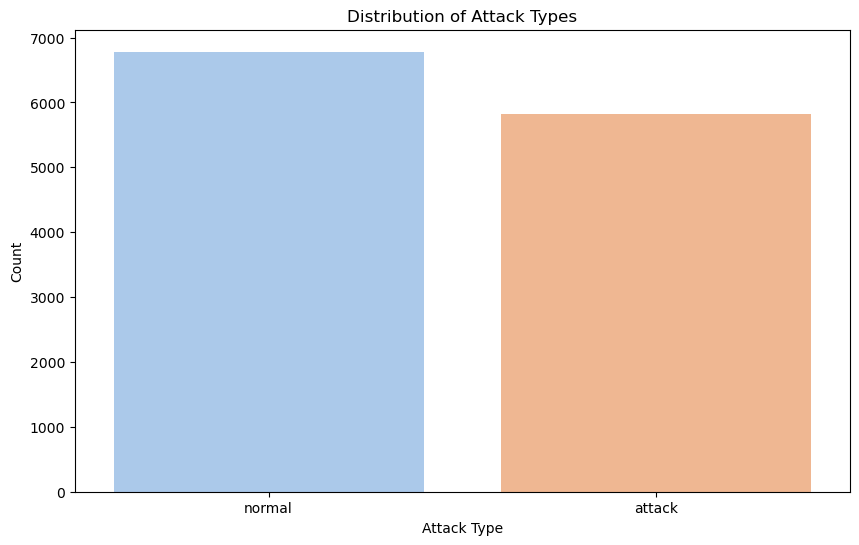

In [ ]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()

In [ ]:
df.describe()



{"metadata":{"kernelspec":{"name":"python3" display_name:"Python 3"  \
count                                            0                       0   
unique                                           0                       0   
top                                            NaN                     NaN   
freq                                           NaN                     NaN   

       language:"python"} language_info:{"name":"python" version:"3.10.13"  \
count                   0                              0                 0   
unique                  0                              0                 0   
top                   NaN                            NaN               NaN   
freq                  NaN                            NaN               NaN   

       mimetype:"text/x-python" codemirror_mode:{"name":"ipython" version:3}  \
count                         0                                 0          0   
unique                        0                                 0          0   
top                         NaN                               NaN        NaN   
freq                        NaN                               NaN        NaN   

       pygments_lexer:"ipython3" nbconvert_exporter:"python"  ...  \
count                          0                           0  ...   
unique                         0                           0  ...   
top                          NaN                         NaN  ...   
freq                         NaN                         NaN  ...   

       {"cell_type":"code".53  \
count                       0   
unique                      0   
top                       NaN   
freq                      NaN   

       source:"# Create the countplot\nplt.figure(figsize=(10  \
count                                                   0       
unique                                                  0       
top                                                   NaN       
freq                                                  NaN       

        6))\nsns.countplot(x=y_pred_string  \
count                                    0   
unique                                   0   
top                                    NaN   
freq                                   NaN   

        palette=\"pastel\")\n\n# Add labels and title\nplt.xlabel(\"Attack Type\")\nplt.ylabel(\"Count\")\nplt.title(\"Distribution of Attack Types\")\n\n# Show the plot\nplt.show()"  \
count                                                   0                                                                                                                                
unique                                                  0                                                                                                                                
top                                                   NaN                                                                                                                                
freq                                                  NaN                                                                                                                                

       metadata:{}.50 execution_count:78  \
count               0                  0   
unique              0                  0   
top               NaN                NaN   
freq              NaN                NaN   

       outputs:[{"output_type":"display_data".9  \
count                                         0   
unique                                        0   
top                                         NaN   
freq                                        NaN   

       data:{"image/png":"iVBORw0KGgoAAAANSUhEUgAAA1sAAAIhCAYAAAC48qAWAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABK2klEQVR4nO3deViVdf7/8deRTUA4AgpHRtyNJLdGDaEcNVwTtcxRB4fRcS23KB3N8WtiM6OTU2rlaOa45ZI1jZrfLBRNTXPNonJtGU1NEDM4qBEo3L8/+nF/PYKKyO1xeT6u676uzud+n/t+3wcv9NXnv